In [1]:
# Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading in the training and testing datasets
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

# Exploratory Data Analysis

In [3]:
# Looking at the head of the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Examining the datatypes for the columns in our training data and looking at null counts
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Getting a percent of how much null data there is per column
round(train.isnull().sum() * 100 / len(train), 1)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

<AxesSubplot:>

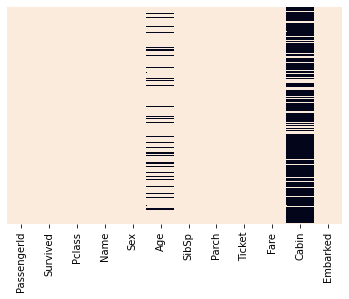

In [14]:
# Visualizing the number of missing values per column. May have to drop Cabin data or change to a more usable format due to large number of nulls
sns.heatmap(
    train.isnull(),
    yticklabels= False,
    cbar= False,
    cmap= "rocket_r"
)

In [4]:
# Getting descriptive statistics for all columns
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Taussig, Miss. Ruth",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
# Creating a dataframe with the numeric type columns from the training data
num_cols = train[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]
num_cols.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [7]:
# Creating a dataframe with the string type columns from the training data
str_cols = train[["Name", "Sex", "Ticket", "Cabin", "Embarked"]]
str_cols.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


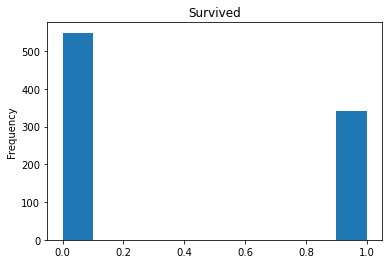

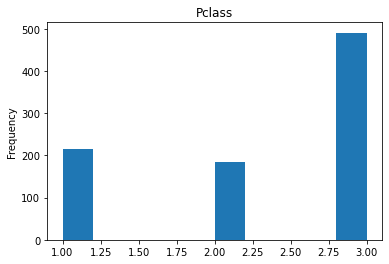

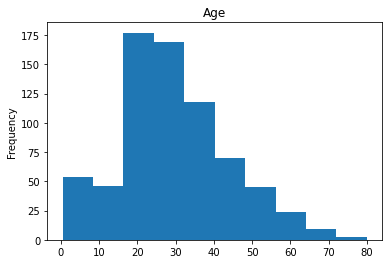

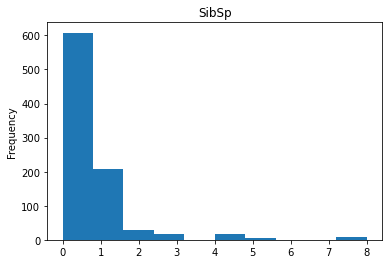

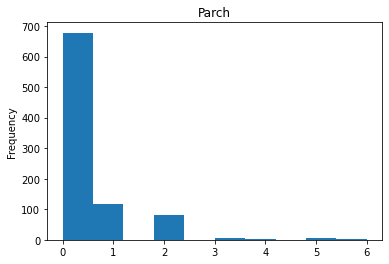

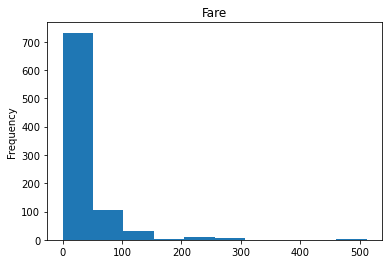

In [8]:
# Looking at the distribution of the numeric type columns
for i in num_cols.columns:
    num_cols[i].plot(
        kind= "hist",
        title= i
        )
    plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

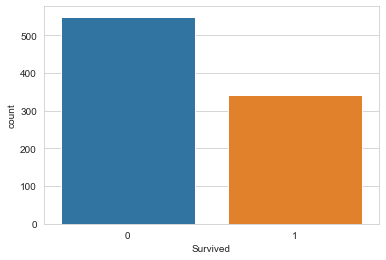

In [15]:
# Looking at how many people survived in the population
sns.set_style("whitegrid")
sns.countplot(x= "Survived", data= train)

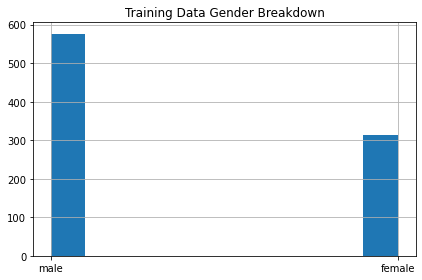

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
# Visually showing the breakdown of the training data by gender
train["Sex"].hist()
plt.title("Training Data Gender Breakdown")
plt.tight_layout()
plt.show()

train.pivot_table(
    values= "Survived",
    index= "Sex"
)

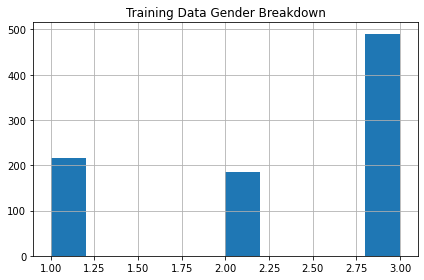

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [31]:
# Visually showing the breakdown of the training data by Pclass
train["Pclass"].hist(    
)
plt.title("Training Data Gender Breakdown")
plt.tight_layout()
plt.show()

train.pivot_table(
    values= "Survived",
    index= "Pclass"
)

# Cleaning/Manipulating Data